In [321]:
import importlib
import DTS_processing_functions
importlib.reload(DTS_processing_functions)
from DTS_processing_functions import *
from tqdm import tqdm

In [69]:
spy =  3.154e+7 
k_diff = 1.09e-6 * spy

tmin = 1923
tmax = 2023
num_steps = 101
depth=20
nz=21

## Fig 1 from Mareschal and Beltrami (1992)

In [122]:
t = np.array([10,30,100,300])
z = np.linspace(0.001,500,501)


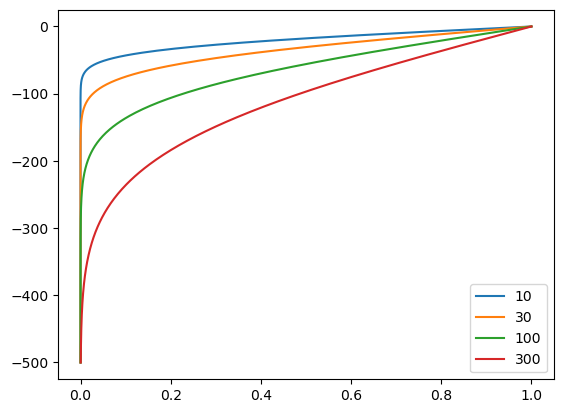

In [124]:
fig,ax=plt.subplots()
for i in t:
    T_z = np.zeros(len(z))
    for k,j in enumerate(z):
        T = math.erfc(j/ (2*np.sqrt(k_diff*i)))
        T_z[k]=T
    ax.plot(T_z,z*-1, label=str(i))
plt.legend()

## A_jk in Equation 6  from Mareschal and Beltrami (1992)

In [424]:
num_steps = 5000
nz=100

t = np.linspace(0.0001,100,num_steps)
z = np.linspace(0.0001,200,nz)

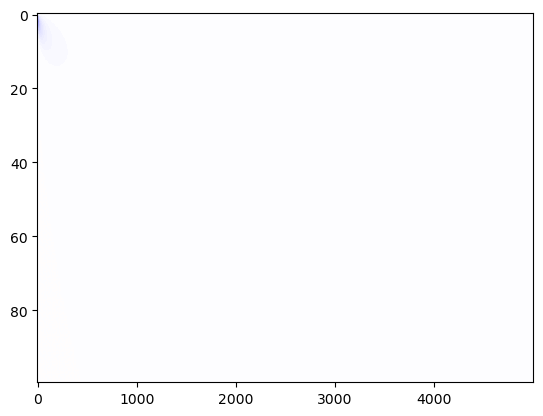

In [432]:
# fig,ax = plt.subplots()
A_jk = np.zeros((len(z),len(t)-1))
for i in range(len(t)-1):
    T_z = np.zeros(len(z))
    for k,j in enumerate(z):
        T = math.erfc(j/ (2*np.sqrt(k_diff*t[i]))) - math.erfc(j/ (2*np.sqrt(k_diff*t[i+1])))
        T_z[k]=T
#     ax.plot(T_z, z*-1)
    A_jk[:,i]=T_z
fig,ax = plt.subplots()
v=.1
ax.imshow(A_jk,cmap='seismic', vmin=-v,vmax=v, aspect='auto')

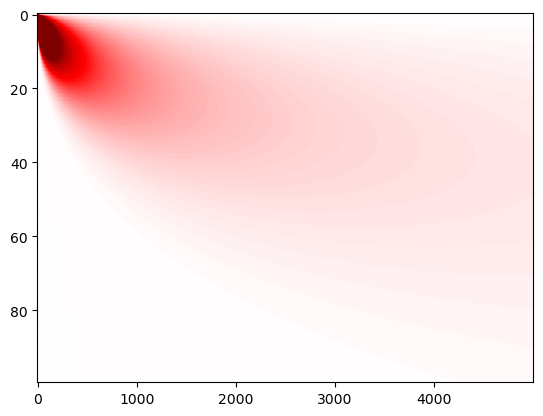

In [444]:
### Error functions flipped around test

# fig,ax = plt.subplots()
A_jk = np.zeros((len(z),len(t)-1))
for i in range(len(t)-1):
    T_z = np.zeros(len(z))
    for k,j in enumerate(z):
        T =  math.erfc(j/ (2*np.sqrt(k_diff*t[i+1]))) - math.erfc(j/ (2*np.sqrt(k_diff*t[i])))
        T_z[k]=T
#     ax.plot(T_z, z*-1)
    A_jk[:,i]=T_z
    
fig,ax = plt.subplots()
v=0.001
ax.imshow(A_jk,cmap='seismic', vmin=-v,vmax=v, aspect='auto')
plt.show()

## Creat a synthetic temeprature signal

Text(0.5, 0, 'Years Before Present')

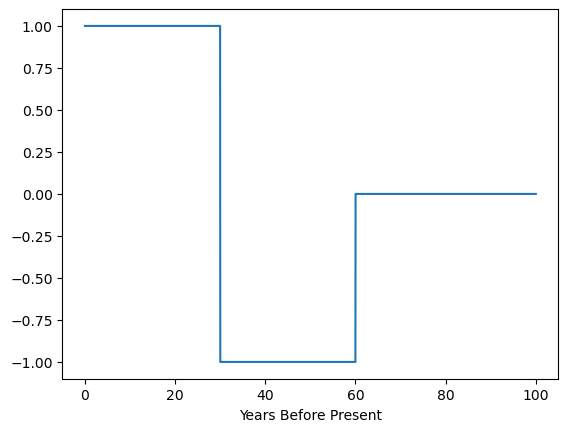

In [462]:
syn_temp = np.zeros(len(t))
stop = int(.3*len(t))
syn_temp[:stop] = 1
syn_temp[stop:2*stop] = -1
syn_temp[4*stop:] = 0


fig,ax = plt.subplots()
ax.plot(t,syn_temp)
ax.set_xlabel('Years Before Present')

## Forward model the borehole

Running model to steady state
.
No velocity arrays set, setting to constant value.
t = 0 ; dt = 0.02000398079615923 ; melt rate = 0.0 ; melt cum =  0.0 ; q_b =  0.0
t = 20 ; dt = 0.02000398079615923 ; melt rate = 0.0 ; melt cum =  0.0 ; q_b =  0.0
t = 40 ; dt = 0.02000398079615923 ; melt rate = 0.0 ; melt cum =  0.0 ; q_b =  0.0
t = 60 ; dt = 0.02000398079615923 ; melt rate = 0.0 ; melt cum =  0.0 ; q_b =  0.0
t = 80 ; dt = 0.02000398079615923 ; melt rate = 0.0 ; melt cum =  0.0 ; q_b =  0.0
t = 100 ; dt = 0.02000398079615923 ; melt rate = 0.0 ; melt cum =  0.0 ; q_b =  0.0


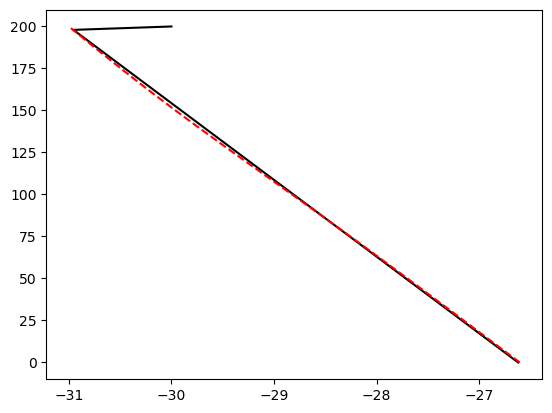

In [463]:
steady_state, modeled_profile = foreword_modeler_v2(t,
                                                    z,
                                                    Ts=-31,
                                                    timeseries_toModel=syn_temp,
                                                    model_timeseries=True)

fig,ax=plt.subplots()
ax.plot(steady_state,z,c='black')
ax.plot(modeled_profile,z,c='r',ls='--')

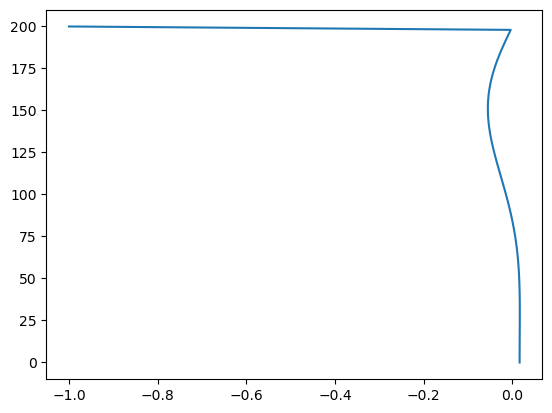

In [464]:
anomaly = (modeled_profile-steady_state)
fig,ax = plt.subplots()
ax.plot(anomaly,z)

## Do the inversion using SVD and then plot

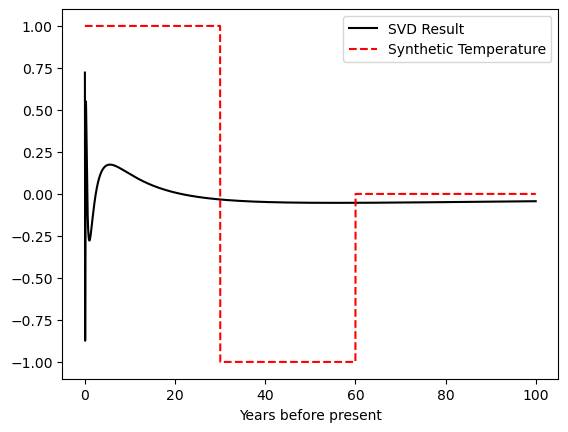

In [475]:
inversed_SVD = inverser_SVD(A_jk,anomaly,nz=nz,p=6)

fig, ax = plt.subplots()
ax.plot(t[:-1],inversed_SVD[0],label='SVD Result', c='black')
ax.plot(t,syn_temp,label='Synthetic Temperature',c='red',ls='--')
ax.set_xlabel('Years before present')
ax.legend()
plt.show()

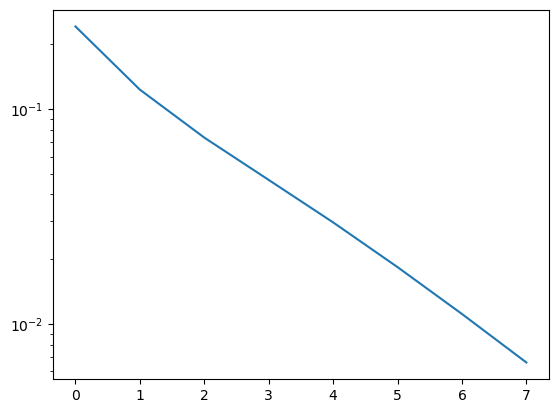

In [440]:
fig, ax = plt.subplots()
ax.plot(np.diag(inversed_SVD[2]))
ax.set_yscale('log')
plt.show()

## Do the inversion with least squares

Text(0.5, 0, 'Years before present')

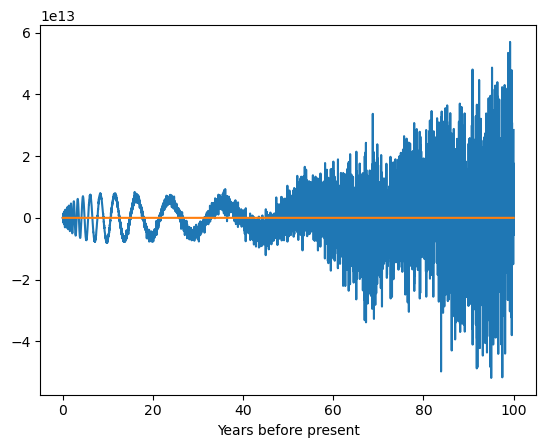

In [441]:
inversed_LS= inverser_LS(A_jk,anomaly,nz=nz)

fig, ax = plt.subplots()
ax.plot(t[:-1],inversed_LS)
ax.plot(t,syn_temp)
ax.set_xlabel('Years before present')